**Magnum Opus Task**
Finding Cosine Similarity Between Two Documents

In [3]:
import nltk
import string
from nltk.corpus import inaugural, stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import math
import matplotlib.pyplot as plt

In [4]:
def preprocess(text):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text.lower())
    return [
        token for token in tokens 
        if token.isalnum() and token not in stop_words and token not in string.punctuation
]

In [5]:
def document_cosine_similarity(tokens1, tokens2):
    freq1 = Counter(tokens1)
    freq2 = Counter(tokens2)
    all_words = set(freq1).union(set(freq2))
    vec1 = [freq1.get(word, 0) for word in all_words]
    vec2 = [freq2.get(word, 0) for word in all_words]
    dot_product = sum(a * b for a, b in zip(vec1, vec2))
    mag1 = math.sqrt(sum(a * a for a in vec1))
    mag2 = math.sqrt(sum(b * b for b in vec2))
    if mag1 == 0 or mag2 == 0:
        return 0.0
    return dot_product / (mag1 * mag2)



In [8]:
obama_text = inaugural.raw('2009-Obama.txt')
trump_text = inaugural.raw('2017-Trump.txt')
obama_tokens = preprocess(obama_text)
trump_tokens = preprocess(trump_text)
print("Obama 2009 Speech (first 500 characters):\n", obama_text[:500], "\n")
print("Trump 2017 Speech (first 500 characters):\n", trump_text[:500], "\n")

Obama 2009 Speech (first 500 characters):
 My fellow citizens:

I stand here today humbled by the task before us, grateful for the trust you have bestowed, mindful of the sacrifices borne by our ancestors. I thank President Bush for his service to our nation, as well as the generosity and cooperation he has shown throughout this transition.

Forty-four Americans have now taken the presidential oath. The words have been spoken during rising tides of prosperity and the still waters of peace. Yet, every so often the oath is taken amidst gat 

Trump 2017 Speech (first 500 characters):
 Chief Justice Roberts, President Carter, President Clinton, President Bush, President Obama, fellow Americans, and people of the world: Thank you.

We, the citizens of America, are now joined in a great national effort to rebuild our country and restore its promise for all of our people. Together, we will determine the course of America and the world for many, many years to come. We will face challenges, we 

In [9]:
similarity = document_cosine_similarity(obama_tokens, trump_tokens)
print(f"Cosine similarity: {similarity:.4f}\n")

Cosine similarity: 0.4687



In [10]:
obama_freq = Counter(obama_tokens)
trump_freq = Counter(trump_tokens)
common_words = set(obama_freq.keys()).intersection(set(trump_freq.keys()))
top_common_words = sorted(common_words, key=lambda x: obama_freq[x] + trump_freq[x], reverse=True)[:15]
obama_counts = [obama_freq[word] for word in top_common_words]
trump_counts = [trump_freq[word] for word in top_common_words]


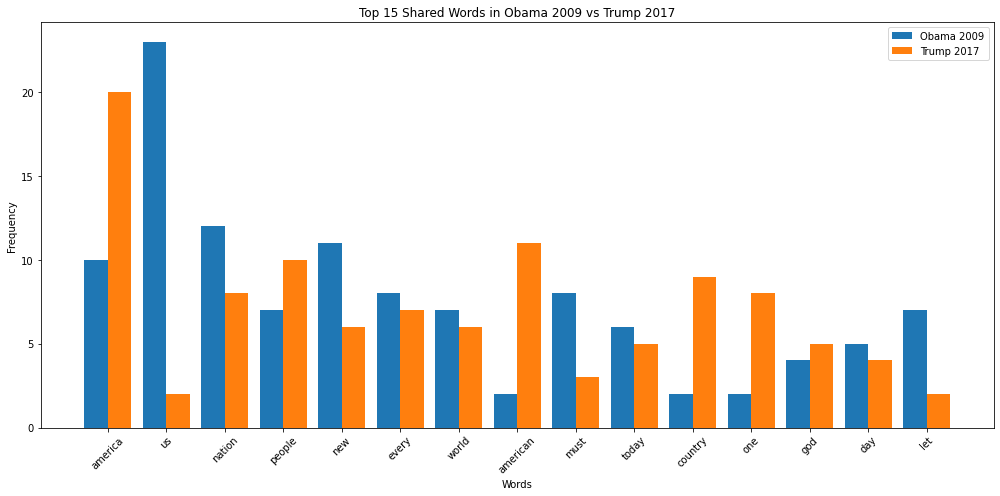

In [11]:
x = range(len(top_common_words))
plt.figure(figsize=(14, 7))
plt.bar(x, obama_counts, width=0.4, label='Obama 2009', align='center')
plt.bar([i + 0.4 for i in x], trump_counts, width=0.4, label='Trump 2017', align='center')
plt.xticks([i + 0.2 for i in x], top_common_words, rotation=45)
plt.title("Top 15 Shared Words in Obama 2009 vs Trump 2017")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()